In [85]:
import pypsa
import pandas as pd

In [86]:
n = pypsa.Network()
n

Empty PyPSA Network
Components: none
Snapshots: 1

In [87]:
n.add('Bus', 'electricity')
n.add('Bus', 'heat')

Index(['heat'], dtype='object')

In [127]:
snapshots = pd.date_range(start="2040-01-01", end="2099-12-31", freq="D")
n.set_snapshots(snapshots)

url1 = '/Users/kian/GitHub/Mars-Electricity-Planning/data/Mars_Electricity_Demand_Daily_2040_2100.csv'
url2 = '/Users/kian/GitHub/Mars-Electricity-Planning/data/Mars_Heat_Demand_Daily_2040_2100.csv'
elec = pd.read_csv(url1)
heat = pd.read_csv(url2)
elec = elec["Demand (kW)"]
heat = heat["Demand (kW)"]

# Reindex to match snapshots
elec.index = snapshots
heat.index = snapshots

In [125]:
n.add(
    'Load',
    'power demand',
    bus = 'electricity',
    p_set = elec,
    overwrite = True
)
n.add(
    'Load',
    'heat demand',
    bus = 'heat',
    p_set = heat,
    overwrite = True
)

Index(['heat demand'], dtype='object', name='Load')

<Axes: xlabel='snapshot', ylabel='kW'>

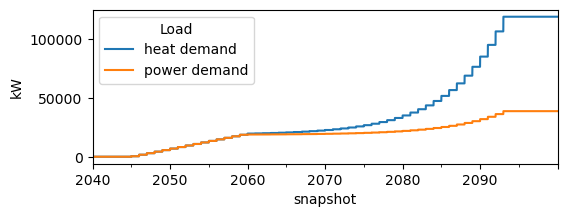

In [126]:
n.loads_t.p_set.plot(figsize = (6, 2), ylabel = 'kW')

In [ ]:
carriers = [
    'solar', 'nuclear', 'geothermal', 'heater', 'hydrogen storage', 'battery storage'
]
colors = ['gold', 'dodgerblue', 'brown', 'gold', 'indianred', 'magenta']

n.add(
    'Carrier',
    carriers,
    color = colors,
)